<a href="https://colab.research.google.com/github/Ngoc99/Knn/blob/master/3_Exercise_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Decision Tree

## Use Decision Tree to classify the Iris dataset
- dataset: 'Iris.csv'


In [0]:
df = 'Iris.csv'

**Grab the data**

In [65]:
 import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = pd.read_csv(df)
dataset.shape

(150, 6)

In [66]:
# Overview about dataset
dataset.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# **PREPARE THE TRANING DATA AND TEST DATA** 

In [0]:
X = dataset.drop('Species', axis=1)  
y = dataset['Species']  

In [68]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(120, 5) 120
(30, 5) (30,)


# **Training with Decision Tree**

**a) criterion='gini'**

In [69]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(criterion='gini')  
dt.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
y_pred_dt = dt.predict(X_test)  
y_pred_dt

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [71]:
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")


Decision Tree classifier accuracy score is 0.9666666666666667


In [79]:
accuracy= accuracy_score(y_test,y_pred_dt)
print(f"Decision Tree classifier accuracy score is {accuracy}")

Decision Tree classifier accuracy score is 0.9666666666666667


**b) criterion='entropy'**

In [73]:
from sklearn.tree import DecisionTreeClassifier  
dt2 = DecisionTreeClassifier(criterion='entropy')  
dt2.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
y_pred_dt = dt2.predict(X_test)  
y_pred_dt

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [75]:
dt2_score = dt2.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")

Decision Tree classifier accuracy score is 0.9666666666666667


In [81]:
accuracy= accuracy_score(y_test,y_pred_dt)
print(f"Decision Tree classifier accuracy score is {accuracy}")

Decision Tree classifier accuracy score is 0.9666666666666667


# **Visualize decision tree**

In [76]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None)
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [42, 40, 38]"] ;
1 [label="gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 101.5\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]"] ;
2 -> 4 ;
}


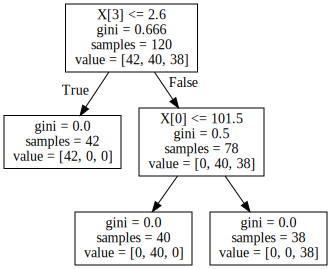

In [77]:
import graphviz 
graph = graphviz.Source(dot_data)
graph